# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

import statsmodels.api as sm
from statsmodels.formula.api import ols

import pylab as plt


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Your code here. 
x_values = [17,51,27,21,36,48,19,26,54,30]
y_values = [10,1,5,9,4,2,9,6,0,3]
student_data = pd.DataFrame({'StudentID': [1,2,3,4,5,6,7,8,9,10],'Age': x_values, 'Tardies': y_values})
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

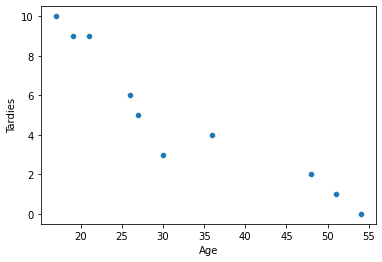

In [3]:
# Your code here.
sb.scatterplot(x = student_data.Age, y = student_data.Tardies)


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
#Vemos que los más pequeños llegan más tarde. También, que esta dispersión se podría considerar lineal

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
covarianza = student_data.cov()
correlacion = student_data.corr()
print('Covarianza')
print(covarianza)
print('\n'+ 'Correlacion')
print(correlacion)

'''
La covarianza nos indica el nivel de crecimiento entre las dos variables. Si esta es positiva y muy grande, quiere decir que
ambas variables van creciendo mientras avanzan y lo mismo si es negativa pero de manera decreciente.
La correlación nos dice si están relacionadas dichas variables, es decir, si una depende de otra.

Correlación: 
StudentID y Age están poco relacionado, no se podría tomar como dependencia lineal, pasa lo mismo con StudentID y Tardies.
Age y Tardies está muy ralcionado, se aproxima a -1, entonces sí podemos decir que son linealmente dependientes.

Covarianza:
Vemos que cuando va creciendo Age, Tardies baja, por eso su coavarianza es negativa y grande.
'''

Covarianza
           StudentID         Age    Tardies
StudentID   9.166667    7.722222  -3.722222
Age         7.722222  187.655556 -45.566667
Tardies    -3.722222  -45.566667  12.544444

Correlacion
           StudentID       Age   Tardies
StudentID   1.000000  0.186190 -0.347113
Age         0.186190  1.000000 -0.939163
Tardies    -0.347113 -0.939163  1.000000


'\nLa covarianza nos indica el nivel de crecimiento entre las dos variables. Si esta es positiva y muy grande, quiere decir que\nambas variables van creciendo mientras avanzan y lo mismo si es negativa pero de manera decreciente.\nLa correlación nos dice si están relacionadas dichas variables, es decir, si una depende de otra.\n\nCorrelación: \nStudentID y Age están poco relacionado, no se podría tomar como dependencia lineal, pasa lo mismo con StudentID y Tardies.\nAge y Tardies está muy ralcionado, se aproxima a -1, entonces sí podemos decir que son linealmente dependientes.\n\nCovarianza:\nVemos que cuando va creciendo Age, Tardies baja, por eso su coavarianza es negativa y grande.\n'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Your response here.

x = student_data.Age   
y = student_data.Tardies
x_const = sm.add_constant(x) 

modelo = sm.OLS(y, x_const).fit() 

pred = modelo.predict(x_const) 

print(modelo.summary());
try :
    const = modelo.params[0] 
    coef = modelo.params[1] 

    x_l=np.linspace(x.min(), x.max(), 50) 
    y_l= coef*x_l + const 
except: 
    pass




#Estamos usando una regrasión lineal.
#Nos devuelve una tabla con la información básica de la regresión.

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           5.57e-05
Time:                        12:22:57   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

Plot your regression model on your scatter plot.

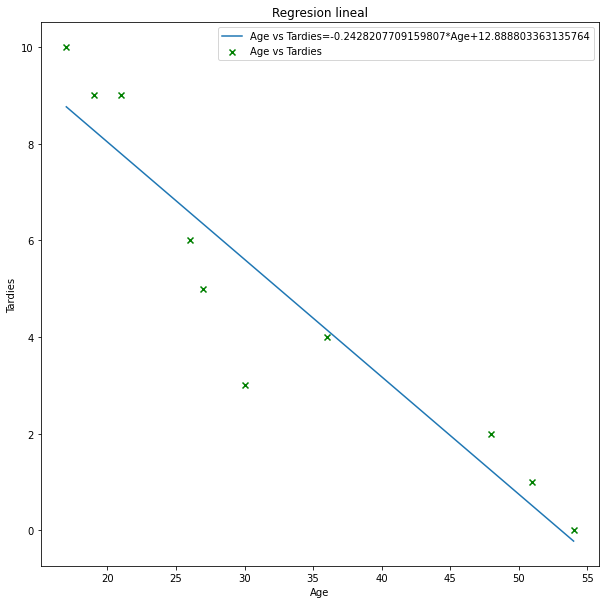

In [7]:
# Your code here.
plt.figure(figsize=(10, 10));


plt.plot(x_l, y_l, label=f'{x.name} vs {y.name}={coef}*{x.name}+{const}');

plt.scatter(x, y, marker='x', c='g', label=f'{x.name} vs {y.name}');

plt.title('Regresion lineal')
plt.xlabel(f'{x.name}')
plt.ylabel(f'{y.name}')
plt.legend()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [8]:
# Your response here. 
#Podemos ver que nuestra predicción era erronea sobre Age y Tardies. Se puede representar como una recta, pero 
#solo contiene a unos pocos de ellos, el resto son errores. También podemos ver que hay una pequeña dependencia lineal

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [9]:
# Import any libraries you may need & the data
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

import statsmodels.api as sm
from statsmodels.formula.api import ols

import pylab as plt


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
veh = pd.read_csv('C:/Users/andre/Documents/GitHub/Apuntes-de-Clase-Iron/Apuntes Clase/Week_5/Day_2/Lab_Exercices/vehicles.csv')
veh.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [10]:
#Your response here.
correlacion = veh.corr()
correlacion
correlacion['CO2 Emission Grams/Mile']
#La más importante para determinar 'CO2 Emission Grams/Mile' es Fuel Barrels/Year. La que menos nos va a ayudar es Year

Year                      -0.222300
Engine Displacement        0.803520
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
City MPG                  -0.894139
Highway MPG               -0.926405
Combined MPG              -0.926229
CO2 Emission Grams/Mile    1.000000
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

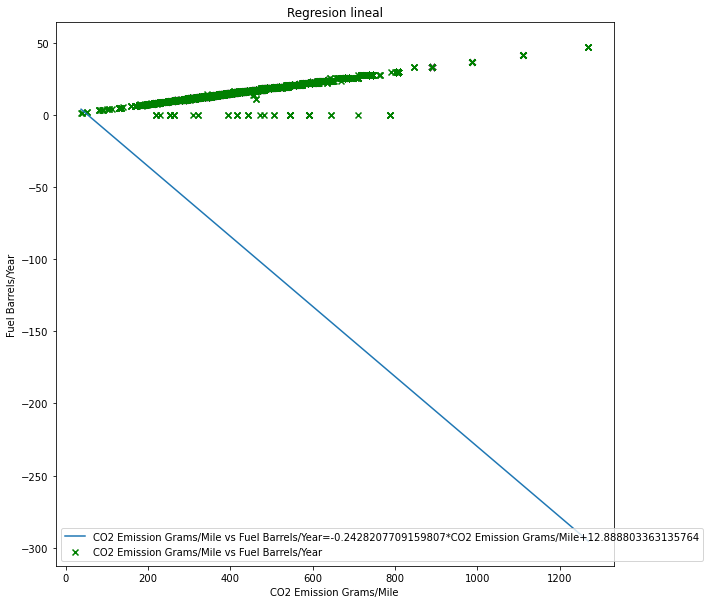

In [11]:
# Your response here. 
def dib_regression_model(x,y):
    
    try:
        const = modelo.params[0] # create a variable with the value of the constant given by the summary
        coef = modelo.params[1] # create a variable with the value of the coef given by the summary

        x_l=np.linspace(x.min(), x.max(), 50) 
        y_l= coef*x_l + const # function of the line

        plt.figure(figsize=(10, 10));

        # plot the line
        plt.plot(x_l, y_l, label=f'{x.name} vs {y.name}={coef}*{x.name}+{const}');

        # data
        plt.scatter(x, y, marker='x', c='g', label=f'{x.name} vs {y.name}');

        plt.title('Regresion lineal')
        plt.xlabel(f'{x.name}')
        plt.ylabel(f'{y.name}')
        plt.legend()
        plt.show();
        return modelo
    except:
        print('No se puede imprimir la recta de regresión para modelos multivariable')
        plt.show();
        return modelo
dib_regression_model(veh['CO2 Emission Grams/Mile'], veh['Fuel Barrels/Year'])
#Estamos usando la regresión lineal de CO2 Emission Grams/Mile y Fuel Barrels/Year

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [12]:
# Your response here. 

x = veh['CO2 Emission Grams/Mile']
y = veh['Fuel Barrels/Year']
x_const = sm.add_constant(x) # add a constant to the model

modelo = sm.OLS(y, x_const).fit() # fit the model

pred = modelo.predict(x_const) # make predictions

print(modelo.summary())

#Hemos cogido las dos variables que tienen más relación, CO2 y Fuel. Podemos ver que hay una dependencia lineal. 
#También tenemos varios errores.

                            OLS Regression Results                            
Dep. Variable:      Fuel Barrels/Year   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.275e+06
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:22:59   Log-Likelihood:                -40183.
No. Observations:               35952   AIC:                         8.037e+04
Df Residuals:                   35950   BIC:                         8.039e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [13]:
# Your code here. 
p = pd.DataFrame({'P_inv': [1,3,4,6,8,9,11,14], 'P_att': [1,2,4,4,5,7,8,13]})
p

,P_inv,P_att
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

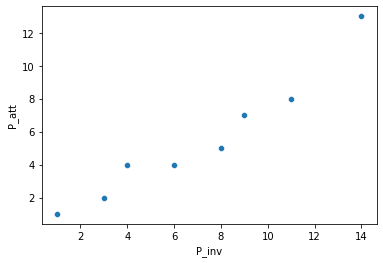

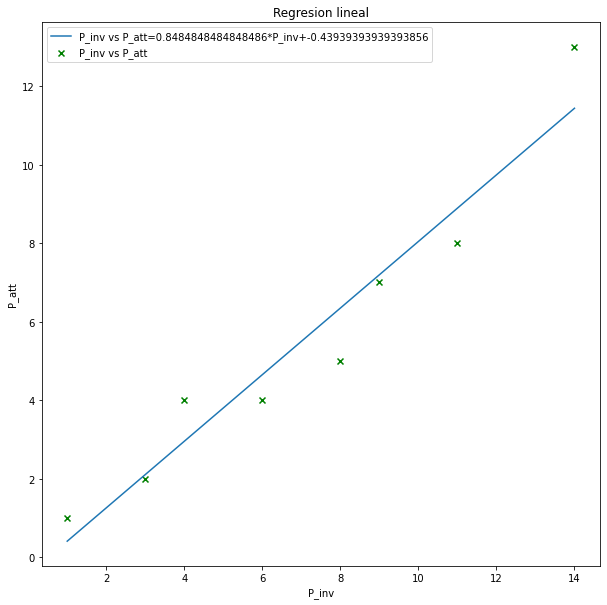

In [14]:
# Your code here.
sb.scatterplot(x= p.P_inv, y = p.P_att)
def plot_regression_model(x,y):
    
    x_const = sm.add_constant(x) # add a constant to the model
    
    modelo = sm.OLS(y, x_const).fit() # fit the model
    
    pred = modelo.predict(x_const) # make predictions
    
    try:
        const = modelo.params[0] # create a variable with the value of the constant given by the summary
        coef = modelo.params[1] # create a variable with the value of the coef given by the summary

        x_l=np.linspace(x.min(), x.max(), 50) 
        y_l= coef*x_l + const # function of the line

        plt.figure(figsize=(10, 10));

        # plot the line
        plt.plot(x_l, y_l, label=f'{x.name} vs {y.name}={coef}*{x.name}+{const}');

        # data
        plt.scatter(x, y, marker='x', c='g', label=f'{x.name} vs {y.name}');

        plt.title('Regresion lineal')
        plt.xlabel(f'{x.name}')
        plt.ylabel(f'{y.name}')
        plt.legend()
        plt.show();
        return modelo
    except:
        print('No se puede imprimir la recta de regresión para modelos multivariable')
        plt.show();
        return modelo
     
plot_regression_model( p['P_inv'], p['P_att'])

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [15]:
# Your response here. 
#Al tener pocos datos podemos ver que no se termina de ajustar a la recta. Dado que esta solo contiene a dos de ellos,
#por eso sale tantos errores.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

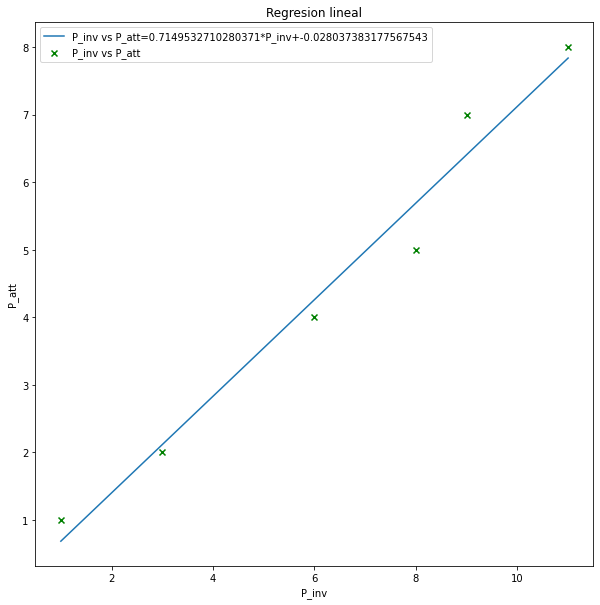

In [16]:
# Your response here. 
p.drop([2,7], axis= 0, inplace = True)
p
plot_regression_model( p['P_inv'], p['P_att'])

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [17]:
# Your response here. 
#Hemos quitado los valores más extremos que nos desajustaban más la regresión, consiguiendo que ahora se ajuste más. Sin embargo, 
#sigue sin ajustarse del todo. Para eso necesitaríamos más datos.